In [2]:
import cv2
import matplotlib.pyplot as plt

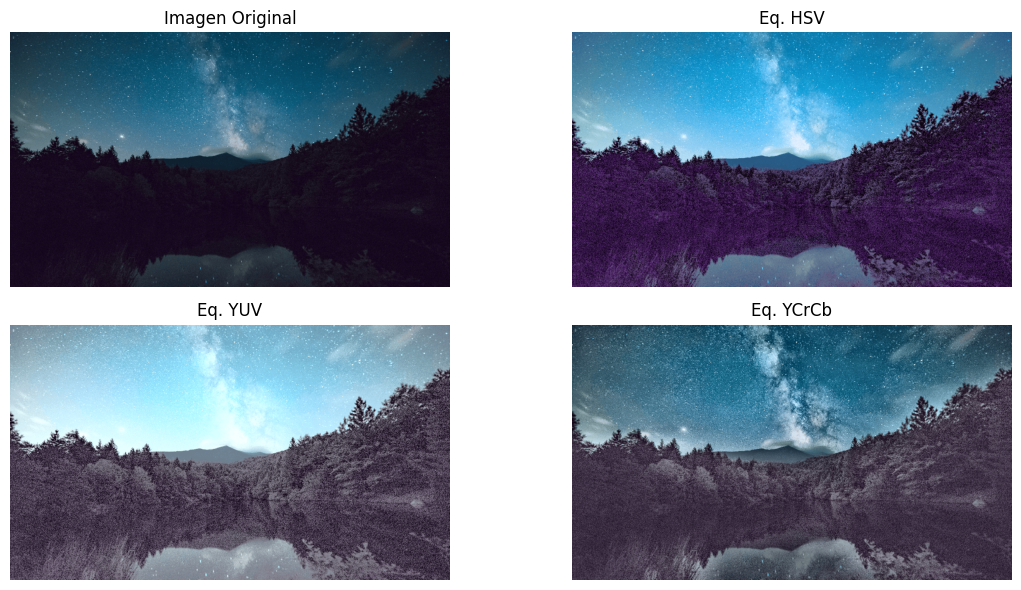

In [11]:
img = cv2.imread("./noche-estrellada.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# primer método
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
v_eq = cv2.equalizeHist(v)
img_hsv_eq = cv2.merge((h, s, v_eq))
hsv_eq_rgb = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)

 # segundo método
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
yuv_eq_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# tercer método
img_yrb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
clahe = cv2.createCLAHE(clipLimit=12, tileGridSize=(16, 16))
img_yrb[:, :, 0] = clahe.apply(img_yrb[:, :, 0])
yrb_eq_rgb = cv2.cvtColor(img_yrb, cv2.COLOR_YCrCb2RGB)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hsv_eq_rgb)
plt.title("Eq. HSV")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(yuv_eq_rgb)
plt.title("Eq. YUV")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(yrb_eq_rgb)
plt.title("Eq. YCrCb")
plt.axis('off')

plt.tight_layout()
plt.show()


